<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Car ID               2500 non-null   int64  
 1   Engine Size          2500 non-null   float64
 2   Mileage              2500 non-null   int64  
 3   Price                2500 non-null   float64
 4   Fuel Type_Electric   2500 non-null   bool   
 5   Fuel Type_Hybrid     2500 non-null   bool   
 6   Fuel Type_Petrol     2500 non-null   bool   
 7   Transmission_Manual  2500 non-null   bool   
 8   Condition_New        2500 non-null   bool   
 9   Condition_Used       2500 non-null   bool   
 10  Model_5 Series       2500 non-null   bool   
 11  Model_A3             2500 non-null   bool   
 12  Model_A4             2500 non-null   bool   
 13  Model_Accord         2500 non-null   bool   
 14  Model_C-Class        2500 non-null   bool   
 15  Model_CR-V           2500 non-null   b

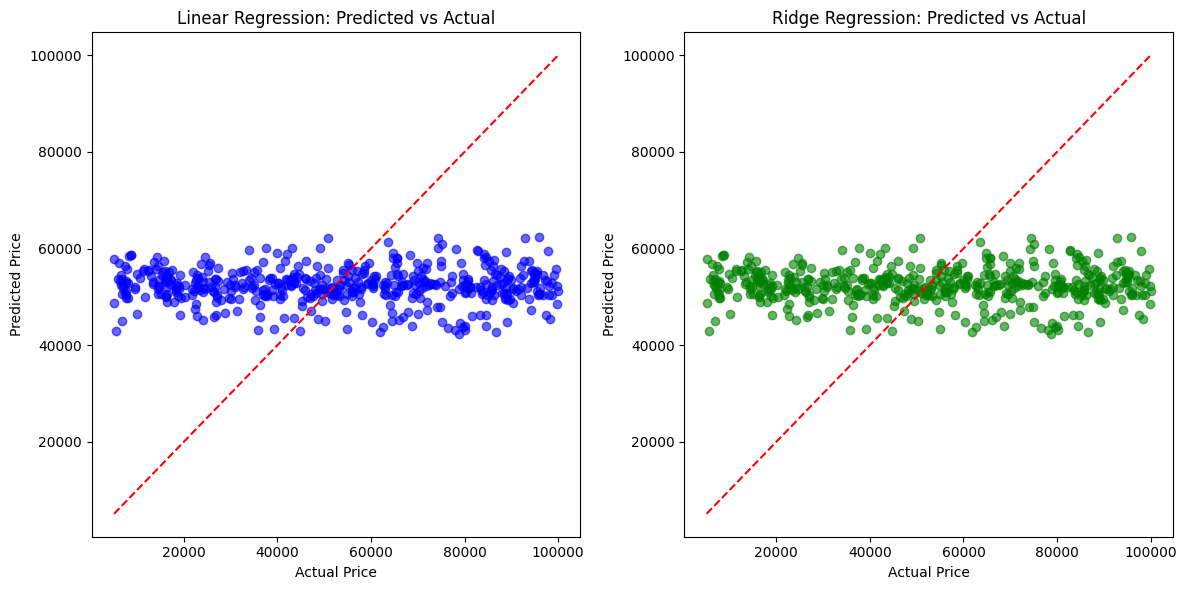

                Feature  Linear Regression Coefficient  \
0                Car ID                     288.117950   
1           Engine Size                    -259.943773   
2               Mileage                     -42.790671   
3    Fuel Type_Electric                   -1398.372553   
4      Fuel Type_Hybrid                   -1124.456429   
5      Fuel Type_Petrol                   -1523.496167   
6   Transmission_Manual                     435.070669   
7         Condition_New                    -186.392022   
8        Condition_Used                      -9.685651   
9        Model_5 Series                    -740.297157   
10             Model_A3                   -1340.586488   
11             Model_A4                   -1070.988273   
12         Model_Accord                    -985.822358   
13        Model_C-Class                    -977.468214   
14           Model_CR-V                   -2048.859307   
15          Model_Camry                    -956.695264   
16          Mo

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

df = pd.read_csv('car_price_prediction_.csv')
df = df.drop(columns=['Brand', 'Year'])
df = pd.get_dummies(df, drop_first=True)
X = df.drop(columns='Price')
y = df['Price']

print(df.info())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)
y_pred_ridge = ridge_model.predict(X_test_scaled)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.6)
plt.title('Linear Regression: Predicted vs Actual')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_ridge, color='green', alpha=0.6)
plt.title('Ridge Regression: Predicted vs Actual')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

plt.tight_layout()
plt.show()
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Linear Regression Coefficient': linear_model.coef_,
    'Ridge Regression Coefficient': ridge_model.coef_
})

print(coefficients)
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print(f'Mean Squared Error (Linear Regression): {mse_linear}')
print(f'Mean Squared Error (Ridge Regression): {mse_ridge}')
